In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
books=pd.read_csv("Books.csv")
ratings=pd.read_csv("Ratings.csv")
users=pd.read_csv("Users.csv")

D:\Jupyter Notebook\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
users.sample(5)

,User-ID,Location,Age
240114,240115,"bloomfield, new jersey, usa",32.0
263771,263772,"ho chi minh, wisconsin, vietnam",24.0
273150,273151,"philadelphia, pennsylvania, usa",36.0
31407,31408,"pittsburgh, pennsylvania, usa",46.0
102070,102071,"cropwell, alabama, usa",70.0


# Data preprocessing

In [6]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


### Books

In [7]:
#info
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [8]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [9]:
#since the missing values are less dropping them
books.dropna(inplace=True)

In [10]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [11]:
#checking duplicates
books.duplicated().sum()

0

In [12]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271354,271354,271354,271354,271354,271354,271354,271354
unique,271354,242130,102020,200,16803,271038,271038,271038
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/014062080X.0...,http://images.amazon.com/images/P/014062080X.0...,http://images.amazon.com/images/P/014062080X.0...
freq,1,27,632,13902,7535,2,2,2


1. Most famous book title is **Selected Poems**
2. Most famous book author is **Agatha Christie**
3. Most famous book Publisher is **Harlequin**

### Users

In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [14]:
users.isnull().sum()/users.shape[0]*100

User-ID      0.000000
Location     0.000000
Age         39.719857
dtype: float64

In [15]:
#checking duplicates
users.duplicated().sum()

0

In [16]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


Age column clearly has an outlier i.e., max age is 244 which is not possible

### Ratings

In [17]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [18]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [19]:
#checking duplicates
ratings.duplicated().sum()

0

In [20]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


# Popularity based recommender system

In [21]:
new_df=books.merge(ratings,on='ISBN')
new_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


In [22]:
new_df.shape

(1031129, 10)

In [23]:
df_with_num_ratings=new_df.groupby(['Book-Title']).count().reset_index()[['Book-Title','Book-Rating']].rename(columns={'Book-Rating':'Num_of_ratings'})
df_with_num_ratings.head()

,Book-Title,Num_of_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [24]:
df_with_num_ratings.shape

(241066, 2)

In [25]:
df_with_avg_ratings=new_df.groupby(['Book-Title']).mean().reset_index()[['Book-Title','Book-Rating']].rename(columns={'Book-Rating':'avg_ratings'})
df_with_avg_ratings.head()

,Book-Title,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00


In [26]:
df_with_avg_ratings.shape

(241066, 2)

In [27]:
books_sorted=df_with_num_ratings.merge(df_with_avg_ratings,on='Book-Title').sort_values(by=['Num_of_ratings'],ascending=False)
books_sorted.head()

,Book-Title,Num_of_ratings,avg_ratings
234946,Wild Animus,2502,1.019584
196322,The Lovely Bones: A Novel,1295,4.468726
183569,The Da Vinci Code,898,4.642539
5303,A Painted House,838,3.231504
199233,The Nanny Diaries: A Novel,828,3.530193


In [28]:
popular_books=books_sorted[books_sorted['Num_of_ratings']>300].sort_values(by=['avg_ratings'],ascending=False).head(100)
popular_books.head()

,Book-Title,Num_of_ratings,avg_ratings
80432,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80420,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80424,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80412,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
187373,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370


In [29]:
popular_books.shape

(100, 3)

In [33]:
popular_books=popular_books.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Publisher','Image-URL-M','Num_of_ratings','avg_ratings']]


In [34]:
popular_books.head()

,Book-Title,Book-Author,Publisher,Image-URL-M,Num_of_ratings,avg_ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,Scholastic,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,Scholastic,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,Scholastic,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
9,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,Scholastic,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
12,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,Del Rey,http://images.amazon.com/images/P/0345339703.0...,368,4.948370


### Top 10 books

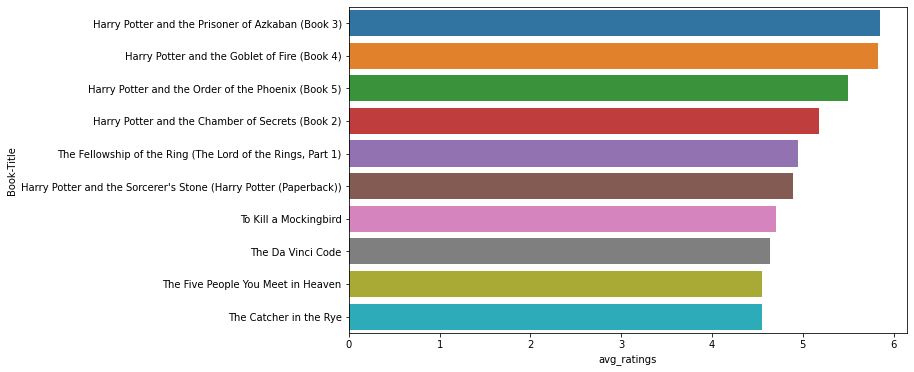

In [46]:
plt.figure(figsize=(10,6))
sns.barplot(x=popular_books['avg_ratings'].head(10),y=popular_books['Book-Title'].head(10));

### Top 10 Books vs Vote counts

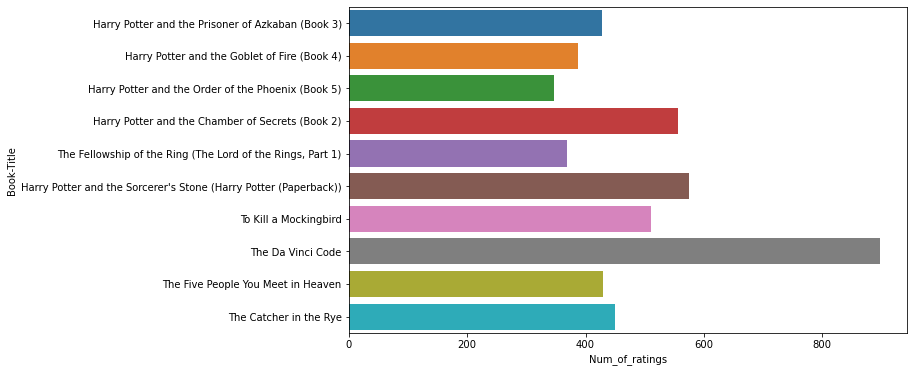

In [49]:
plt.figure(figsize=(10,6))
sns.barplot(x=popular_books['Num_of_ratings'].head(10),y=popular_books['Book-Title'].head(10));

### Most popular publishing house

In [53]:
popular_books['Publisher'].head(10).to_frame()

,Publisher
0,Scholastic
3,Scholastic
5,Scholastic
9,Scholastic
12,Del Rey
21,Arthur A. Levine Books
23,Little Brown &amp; Company
31,Doubleday
37,Hyperion
39,"Little, Brown"


### Most popular Book Authors

In [56]:
popular_books['Book-Author'].head(10).to_frame()

,Book-Author
0,J. K. Rowling
3,J. K. Rowling
5,J. K. Rowling
9,J. K. Rowling
12,J.R.R. TOLKIEN
21,J. K. Rowling
23,Harper Lee
31,Dan Brown
37,Mitch Albom
39,J.D. Salinger
